In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 24

## Estimation

In [ ]:
# Compensation data for employees of the city of San Francisco in 2015
sf = Table.read_table('san_francisco_2015.csv')
sf

In [ ]:
# Look at the Mayor's salary 
# (lot of other interesting things you can look at in the data too)
sf.where('Job', 'Mayor')

In [ ]:
# distribution of SF employee total compensation
sf_bins = np.arange(0, 300000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [ ]:
# Median total compensation of SF employees (population parameter)
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

In [ ]:
# suppose we only had a sample of 300 employees
our_sample = sf.sample(300, with_replacement=False)

In [ ]:
# Let's look at the empirical distribution of our sample
our_sample.hist('Total Compensation', bins=sf_bins)

In [ ]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

## The Bootstrap

In [ ]:
# resample from our original sample to get a bootstrap sample
resample1 = our_sample.sample()

In [ ]:
# calculate the median from our bootstrap sample (i.e., get a bootstrap statistic)
percentile(50, resample1.column('Total Compensation'))

In [ ]:
# get a full bootstrap distribution
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [ ]:
# get a bootstrap distribution with 2000 bootstrap statistics from our one sample
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 2000)

In [ ]:
# visualize the bootstrap distribution
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

plots.scatter(pop_median, 0, color='red', s=40);

In [ ]:
# get a range of plausible values for where the population parameter could be
# (i.e., get a confidence interval)
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)
confidence_interval = make_array(left, right)
confidence_interval

In [ ]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=10, zorder=1)
plots.scatter(pop_median, 0, color='red', s=50, zorder=2);

## A confidence interval for the average age of mothers

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

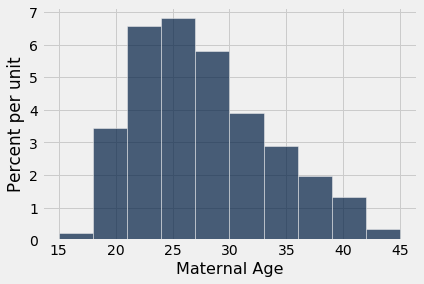

In [9]:
# visuialize mother's ages
births.hist('Maternal Age')

In [ ]:
# calculate the mean age of mothers 
np.mean(births.column('Maternal Age'))

In [10]:
# Bootstrap for sample mean

means = make_array()

for i in np.arange(1000):
    resampled = births.sample()
    mean = np.mean(resampled.column('Maternal Age'))
    means = np.append(means, mean)

In [11]:
# create a 95% confidence interval
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
interval_95

array([26.88841567, 27.57069847])

95% Confidence interval for mean maternal age in population:
[26.888 27.571]


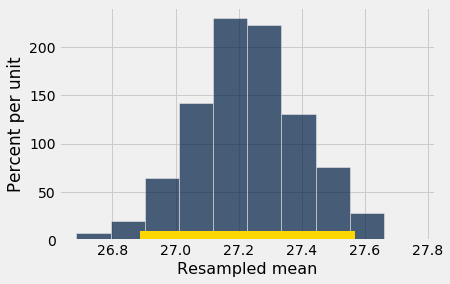

In [12]:
# visualize the bootstrap distribution and the 95% confidence interval
Table().with_column('Resampled mean', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=18)
print('95% Confidence interval for mean maternal age in population:')
print(np.round(interval_95, 3))

In [7]:
# create a 80% confidence interval
interval_80 = make_array(percentile(10, means), percentile(90, means))
interval_80

array([27.01277683, 27.45826235])

80% Confidence interval for mean maternal age in population:
[27.013 27.458]


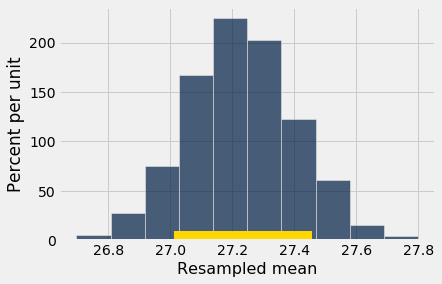

In [8]:
# visualize the bootstrap distribution and the 80% confidence interval
Table().with_column('Resampled mean', means).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=18)
print('80% Confidence interval for mean maternal age in population:')
print(np.round(interval_80, 3))

In [13]:
# Use confidence intervals to run a hypothesis test
# Null:  mean age of mothers = 29
# Alt: mean age of mothers != 29
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
interval_95

array([26.88841567, 27.57069847])